In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

start_date = "2015-01-02"
end_date = "2019-08-11"
#ewu ewus uk spy qqq
spy = get_pricing("spy", start_date = start_date, end_date = end_date, fields= "price").resample('w').last().pct_change()[1:]
acwi = get_pricing("qqq", start_date = start_date, end_date = end_date, fields= "price").resample('w').last().pct_change()[1:]
ief = get_pricing("ief", start_date = start_date, end_date = end_date, fields= "price").resample('w').last().pct_change()[1:].fillna(0.0006)
#spy = get_pricing("spy", start_date = start_date, end_date = end_date, fields= "price", frequency = 'daily').pct_change()[1:]
#acwi = get_pricing("qqq", start_date = start_date, end_date = end_date, fields= "price", frequency = 'daily').pct_change()[1:]
#ief = get_pricing("ief", start_date = start_date, end_date = end_date, fields= "price", frequency = 'daily').pct_change()[1:].fillna(0.0006)

ief[100:].mean()

0.0008746546363237383

In [38]:
len(spy)

240

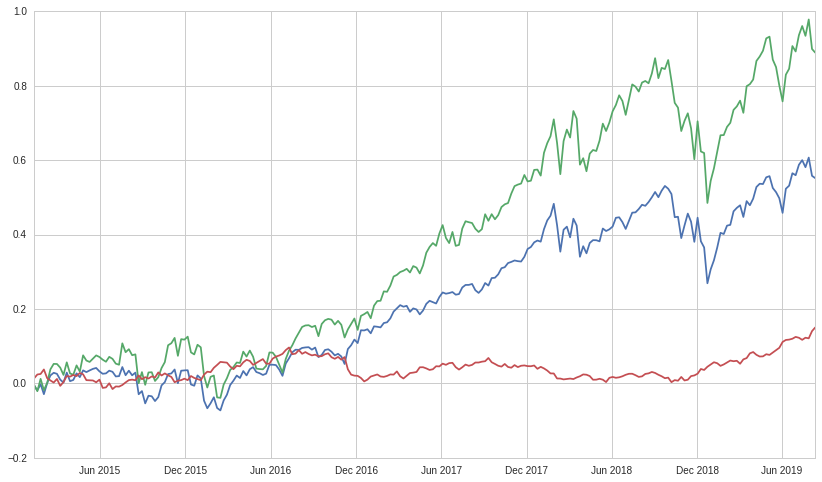

In [39]:
spy_hold = np.cumprod(1+spy)-1
acwi_hold = np.cumprod(1+acwi)-1
ief_hold = np.cumprod(1+ief)-1


plt.plot(spy_hold)
plt.plot(acwi_hold)
plt.plot(ief_hold)

In [40]:
position2 = np.zeros(np.shape(spy))
buy2 = np.zeros(np.shape(spy))
returns2 = np.zeros(np.shape(spy))
log2 = []
for i in range(13, len(spy)-1):
    if np.prod(1+spy[i-12:i]) > np.prod(1+spy[i-13:i-1]):
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns2[i] = ief[i]
            log2.append(1)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns2[i] = acwi[i]
                log2.append(2)
            else:
                returns2[i] = ief[i]
                log2.append(1)
    else:
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns2[i] = acwi[i]
            log2.append(2)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns2[i] = (0.5*spy[i]) + (0.5 * ief[i])
                log2.append(3)
            else:
                returns2[i] = spy[i]
                log2.append(3)
        

0.0321021746634
0.101028507725


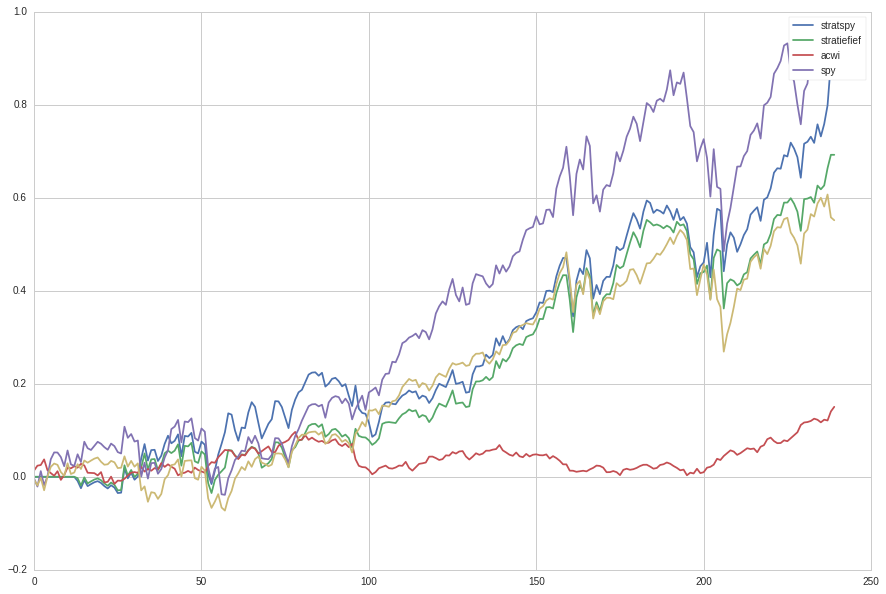

In [41]:
position = np.zeros(np.shape(spy))
buy = np.zeros(np.shape(spy))
returns = np.zeros(np.shape(spy))
log = []
for i in range(13, len(spy)-1):
    if np.prod(1+spy[i-12:i]) > np.prod(1+spy[i-13:i-1]):
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns[i] = 3*ief[i]
            log.append(1)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns[i] = acwi[i]
                log.append(2)
            else:
                returns[i] = 3*ief[i]
                log.append(1)
    else:
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns[i] = acwi[i]
            log.append(2)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns[i] = (0.5*spy[i]) + (1.5 * ief[i])
                log.append(1)
            else:
                returns[i] = spy[i]
                log.append(3)
        

if i == len(spy)-2:
    print(np.prod(1+spy[i-12:i])-1)

    
#returns[i] = position[i] * spy[i]
cum_returns = np.cumprod(1+returns)-1
cum_returns2 = np.cumprod(1+returns2)-1

last = np.prod(1+returns[-13:-1])-1
print(last)
plt.figure(figsize=(15,10))
plt.plot(range(len(cum_returns)),cum_returns)
plt.plot(range(len(cum_returns2)),cum_returns2)

plt.plot(range(len(cum_returns)),ief_hold)

plt.plot(range(len(cum_returns)),acwi_hold)

plt.plot(range(len(cum_returns)),spy_hold)
plt.legend(['stratspy','stratief'  'ief', 'acwi', 'spy'])

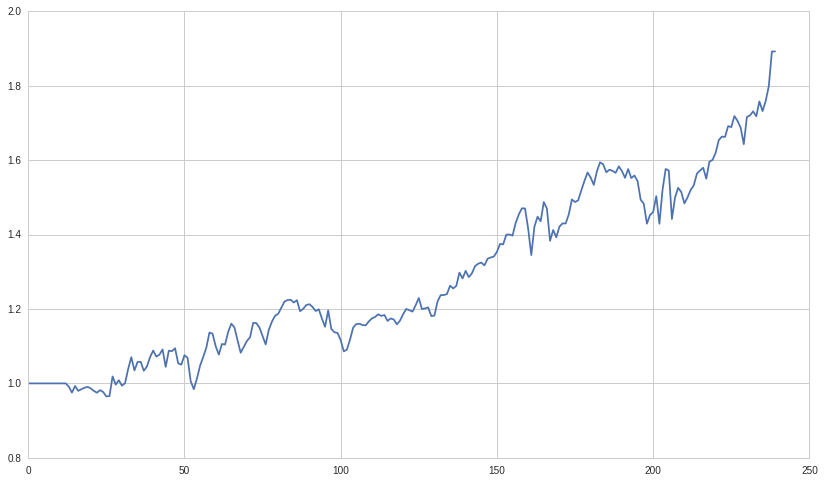

In [42]:
plt.plot(np.cumprod(returns+1))

In [43]:
down= -1*returns[returns<0].mean()
down
(returns.mean()/down)*np.sqrt(52)

1.3467988717404611

In [44]:
float(len(returns[returns>0]))/len(returns)

0.5541666666666667

In [45]:
returns.std() * np.sqrt(52)

0.1448394037370348

In [46]:
(spy.mean()/spy[spy<0].std())*np.sqrt(52)

0.95422342457226883

In [47]:
spy[spy<0].std()

0.015099835318530427

In [30]:
min(returns)* np.sqrt(252)
ret = pd.Series(returns)
down= -1*ret[ret<0].mean()
(ret.mean()/down)*np.sqrt(52)


4.2481597838866518

In [31]:
returns.mean()* 52

0.30281921830454073

(array([ 7.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  9.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

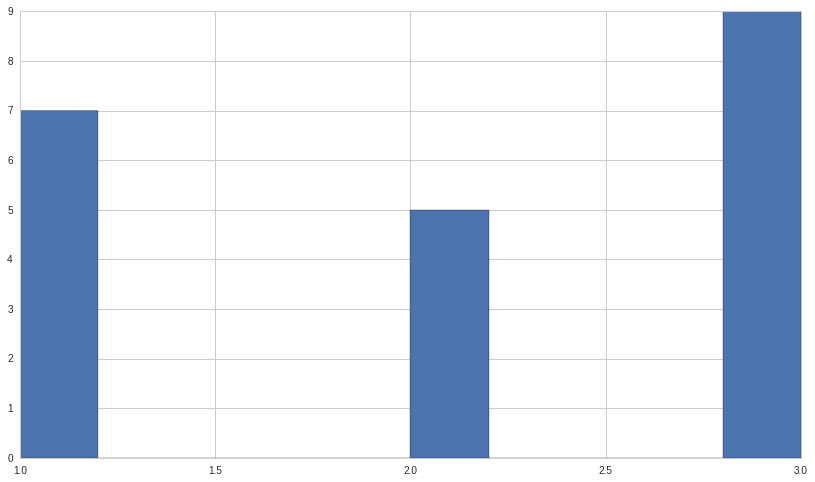

In [32]:
plt.hist(log)

In [33]:
(returns.mean()+1)**52

1.3524812937655346

In [34]:
returns.mean()*52

0.30281921830454073

In [35]:
float(len(returns2[returns2>0]))/len(returns)

0.42857142857142855

In [36]:
count = pd.Series(count)
count[count == count.max()].index[0]

NameError: name 'count' is not defined

In [ ]:
ret[60]

In [ ]:
(returns.mean()+1)**52

In [ ]:
(returns[returns<0].std()+1)**np.sqrt(52)

In [ ]:
x = []

for i in range(len(returns)):
    if i%52 == 0: 
        x.append(np.prod(1+returns[i-52:i])-1)
x = np.array(x)
plt.plot(np.cumprod(x+1))

In [ ]:
'''plt.plot(x)
len(x)
x = pd.DataFrame(x)
y = pd.read_csv("C:\Users\Olaoluwapo\Desktop\Monthly.csv")'''

In [ ]:
float(len(x[x>0]))/len(x)

In [ ]:
len(x)

In [ ]:
len(returns)

In [ ]:
x.max()

In [ ]:
returns[returns<0].std()* np.sqrt(52)

In [ ]:
x[x>0].std()

In [ ]:
x.mean()

In [ ]:
change = []
for i in range(1,len(log)):
    if log[i-1] != log[i]:
        change.append(1)

In [ ]:
float(len(change))/len(log)

In [ ]:
returns.mean() * (52)

In [ ]:
len(returns)

In [ ]:
iei

In [ ]:
float(len(returns[returns>0]))/len(returns)

In [ ]:
(1+returns.mean())**(52)

In [ ]:
ief.std() *np.sqrt(52) * 5

In [ ]:
acwi.std() *np.sqrt(52)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import acf, pacf
from pandas import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X= np.cumprod(1+returns)

In [ ]:
# We'll choose 40 lags. This is a bit arbitrary, but you want to include all the lags you think might
# feasibly impact the current value.
nlags = 100
# Note, this will produce nlags + 1 values, as we include the autocorrelation of
# X[-1] with X[-1], which is trivially 1.
# The reason this is done is because that is the 0th spot in the array and corresponds
# to the 0th lag of X[(-1)-0].
X_acf = acf(X, nlags=nlags)
print('Autocorrelations:\n' + str(X_acf) + '\n')
X_pacf = pacf(X, nlags=nlags)
print('Partial Autocorrelations:\n' + str(X_pacf))

In [ ]:
def plot_acf(X_acf, X_acf_confs, title='ACF'):
    # The confidence intervals are returned by the functions as (lower, upper)
    # The plotting function needs them in the form (x-lower, upper-x)
    errorbars = np.ndarray((2, len(X_acf)))
    errorbars[0, :] = X_acf - X_acf_confs[:,0]
    errorbars[1, :] = X_acf_confs[:,1] - X_acf

    plt.plot(X_acf, 'ro')
    plt.errorbar(range(len(X_acf)), X_acf, yerr=errorbars, fmt='none', ecolor='gray', capthick=2)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(title);
    
# We have to set a confidence level for our intervals, we choose the standard of 95%,
# corresponding with an alpha of 0.05.
X_acf, X_acf_confs = acf(X, nlags=nlags, alpha=0.05)
X_pacf, X_pacf_confs = pacf(X, nlags=nlags, alpha=0.05)
#plot_acf(X_acf, X_acf_confs)
plt.figure(figsize = (15,7.5))
plot_acf(X_acf, X_acf_confs, title='ACF')
plt.figure(figsize = (15,7.5))
plot_acf(X_pacf, X_pacf_confs, title='PACF')